Council District perimeters have changed steadily since 1972. Every 10 years, these districts are revised with new boundaries drawn throughout the county. This analysis looks at this historic dataset and seeks to create maps for understanding these changes over time. Below, a table of contents outlines the chapters and contents of this lab notebook. 

## Table of Contents

### Chapter 1: Exploratory Data Analysis and Wrangling 
This Chapter seeks to import data into the notebook and begin initial exploration of its contents. Datatypes will be assessed and a 'year' column will be added to identify the year of the boundary line. All datasets will then be merged into one, creating the 'district_merge3' variable. 

### Chapter 2: Geoprocessing and Analysis 
This chapter is about processing the data to answer questions based on various attributes. District Boundaries will be assessed to find intersections or overlaps of previous district lines. 

1.1 - Districts 3 & 10 for October 11 

1.2 - Districts 4 & 9 for *********

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 100)

# adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (16, 12)

## Chapter 1: Exploratory Data Analysis and Wrangling

In [3]:
# import data 
councilDistrict1972 = gpd.read_file('data/Council_District_1972-shp.zip')
councilDistrict1982 = gpd.read_file('data/Council_District_1982-shp.zip')
councilDistrict1992 = gpd.read_file('data/Council_District_1992-shp.zip')
councilDistrict2002 = gpd.read_file('data/Council_District_2002-shp.zip')
councilDistrict2012 = gpd.read_file('data/Council_District_2012-shp.zip')

In [4]:
councilDistrict1972.head(11)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry
0,1,6.606818e+09,683972.989305,2,0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097..."
1,2,1.065124e+08,54629.101883,3,0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092..."
2,3,8.660226e+07,51318.615574,4,0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083..."
3,4,1.177660e+08,58358.246684,5,0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063..."
4,5,3.971363e+07,30875.792156,6,0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065..."
5,6,7.522693e+07,47308.311336,7,0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061..."
6,7,1.293373e+08,75631.999628,8,0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060..."
7,8,8.831988e+07,49863.304053,9,0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046..."
8,9,5.614430e+07,32974.271275,10,0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042..."
9,10,7.511896e+07,57327.734099,11,12,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041..."


In [5]:
#check datatypes 
councilDistrict1972.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1972_        int64
DIST1972_I       int64
DISTRICT         int64
REP             object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [6]:
# add year of district 
councilDistrict1972['year'] = "1972"

In [7]:
councilDistrict1972.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year
0,1,6.606818e+09,683972.989305,2,0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972
1,2,1.065124e+08,54629.101883,3,0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972
2,3,8.660226e+07,51318.615574,4,0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972
3,4,1.177660e+08,58358.246684,5,0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972
4,5,3.971363e+07,30875.792156,6,0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972


In [8]:
councilDistrict1982.head(11)

,OBJECTID,AREA,PERIMETER,DIST1982_,DIST1982_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,6.547747e+09,711052.303668,2,1,12,GLORIA MARTIN,http://www.lfucg.com/d12.htm,(606) 258-3200,gloriam@lfucg.com,6.547747e+09,711052.302245,"POLYGON ((-84.45326 38.09343, -84.46219 38.097..."
1,2,1.325028e+08,73629.476039,3,2,2,JACQUES WIGGINTON,http://www.lfucg.com/d2.htm,(606) 258-3200,jwiggingt@lfucg.com,1.325028e+08,73629.476355,"POLYGON ((-84.46647 38.08873, -84.46652 38.088..."
2,3,1.218511e+08,68006.195086,4,3,6,AL MITCHELL,http://www.lfucg.com/d6.htm,(606) 258-3200,albertm2@lfucg.com,1.218511e+08,68006.195306,"POLYGON ((-84.45326 38.09343, -84.45045 38.092..."
3,4,1.331180e+08,64867.498924,5,4,11,RICHARD MOLONEY,http://www.lfucg.com/d11.htm,(606) 258-3200,richardm@lfucg.com,1.331180e+08,64867.500290,"POLYGON ((-84.51836 38.07489, -84.51819 38.073..."
4,5,5.698344e+07,42719.386907,6,5,1,GEORGE BROWN,http://www.lfucg.com/d1.htm,(606) 258-3200,georgeb@lfucg.com,5.698344e+07,42719.386589,"POLYGON ((-84.48232 38.06564, -84.48171 38.064..."
5,6,7.461074e+07,50792.825324,7,6,3,DICK DeCAMP,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,7.461073e+07,50792.824461,"POLYGON ((-84.51631 38.06095, -84.51621 38.060..."
6,7,1.600521e+08,105715.361730,8,9,7,WILLY FOGLE,http://www.lfucg.com/d7.htm,(606) 258-3200,willyf@lfucg.com,1.600521e+08,105715.362465,"POLYGON ((-84.45423 38.04284, -84.45413 38.044..."
7,8,1.230123e+08,57795.831829,9,7,10,SANDY SHAFER,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,1.230123e+08,57795.832617,"POLYGON ((-84.56718 38.03523, -84.56739 38.035..."
8,9,1.115583e+08,54715.341326,10,8,5,"BILL FARMER, JR.",http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com,1.115583e+08,54715.341322,"POLYGON ((-84.48612 38.04189, -84.48496 38.042..."
9,10,1.249425e+08,56040.970453,11,13,4,LINDA GORTON,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com,1.249425e+08,56040.969447,"POLYGON ((-84.52123 38.03166, -84.51990 38.030..."


In [9]:
#check datatypes 
councilDistrict1982.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1982_        int64
DIST1982_I       int64
DISTRICT         int64
REP             object
URL             object
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [10]:
# add year of district 
councilDistrict1982['year'] = "1982"

In [11]:
councilDistrict1992.head(11)

,OBJECTID,AREA,PERIMETER,DIST1992_,DIST1992_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,1.394535e+08,67804.288645,2,4,11,RICHARD MOLONEY,http://www.lfucg.com/d11.htm,(606) 258-3200,richardm@lfucg.com,1.394535e+08,67804.290903,"POLYGON ((-84.51636 38.05003, -84.51634 38.049..."
1,2,9.496719e+07,54684.493323,3,6,3,DICK DeCAMP,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050..."
2,3,6.103075e+09,739921.870762,4,1,12,GLORIA MARTIN,http://www.lfucg.com/d12.htm,(606) 258-3200,gloriam@lfucg.com,6.103075e+09,739921.868077,"POLYGON ((-84.44734 38.09430, -84.44745 38.094..."
3,4,4.075670e+08,138284.312074,5,2,2,JACQUES WIGGINTON,http://www.lfucg.com/d2.htm,(606) 258-3200,jwiggingt@lfucg.com,4.075670e+08,138284.311526,"POLYGON ((-84.45859 38.07955, -84.45647 38.076..."
4,5,1.935929e+08,120052.316712,6,3,6,AL MITCHELL,http://www.lfucg.com/d6.htm,(606) 258-3200,albertm2@lfucg.com,1.935929e+08,120052.316620,"POLYGON ((-84.44734 38.09430, -84.44731 38.094..."
5,6,8.093608e+07,52287.388177,7,5,1,GEORGE BROWN,http://www.lfucg.com/d1.htm,(606) 258-3200,georgeb@lfucg.com,8.093608e+07,52287.387754,"POLYGON ((-84.50312 38.05179, -84.50438 38.052..."
6,7,1.956126e+08,84427.649569,8,7,10,SANDY SHAFER,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,1.956126e+08,84427.650399,"POLYGON ((-84.51919 38.02386, -84.52018 38.021..."
7,8,1.296537e+08,54747.487005,9,8,5,"BILL FARMER, JR.",http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com,1.296537e+08,54747.486733,"POLYGON ((-84.47986 38.04142, -84.47677 38.039..."
8,9,1.696978e+08,89054.914472,10,9,7,WILLY FOGLE,http://www.lfucg.com/d7.htm,(606) 258-3200,willyf@lfucg.com,1.696978e+08,89054.912494,"POLYGON ((-84.45256 38.02923, -84.45247 38.029..."
9,10,1.126018e+08,59041.324064,11,13,4,LINDA GORTON,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com,1.126018e+08,59041.322757,"POLYGON ((-84.52077 38.02055, -84.52050 38.020..."


In [12]:
#check datatypes 
councilDistrict1992.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1992_        int64
DIST1992_I       int64
DISTRICT         int64
REP             object
URL             object
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [13]:
# add year of district 
councilDistrict1992['year'] = "1992"

In [14]:
councilDistrict2002.head(11)

,OBJECTID,AREA,PERIMETER,DIST2002_,DIST2002_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,5.820313e+09,751532.106118,2,1,12,GLORIA MARTIN,http://www.lfucg.com/Council/District12.asp,(859) 258-3200,gloriam@lfucg.com,5.820313e+09,751532.107777,"POLYGON ((-84.47775 38.09588, -84.47811 38.096..."
1,2,4.306799e+08,173325.693661,3,2,2,JACQUES WIGGINTON,http://www.lfucg.com/Council/District02.asp,(859) 258-3200,jwiggingt@lfucg.com,4.306799e+08,173325.693224,"POLYGON ((-84.47775 38.09588, -84.47594 38.094..."
2,3,2.809204e+08,124971.231113,4,3,6,AL MITCHELL,http://www.lfucg.com/Council/District06.asp,(859) 258-3200,albertm2@lfucg.com,2.809204e+08,124971.233188,"POLYGON ((-84.45045 38.09225, -84.45024 38.092..."
3,4,1.357880e+08,60432.687374,5,4,1,GEORGE BROWN,http://www.lfucg.com/Council/District01.asp,(859) 258-3200,georgeb@lfucg.com,1.357880e+08,60432.687004,"POLYGON ((-84.50595 38.07458, -84.50592 38.074..."
4,5,1.229700e+08,49593.356439,6,5,11,RICHARD MOLONEY,http://www.lfucg.com/Council/District11.asp,(859) 258-3200,richardm@lfucg.com,1.229700e+08,49593.356667,"POLYGON ((-84.54176 38.05791, -84.54138 38.057..."
5,6,9.554172e+07,60578.500564,7,6,3,DICK DeCAMP,http://www.lfucg.com/Council/District03.asp,(859) 258-3200,dickd@lfucg.com,9.554173e+07,60578.501888,"POLYGON ((-84.49785 38.05130, -84.49727 38.050..."
6,7,1.709437e+08,59966.992203,8,7,5,"BILL FARMER, JR.",http://www.lfucg.com/Council/District05.asp,(859) 258-3200,billf@lfucg.com,1.709437e+08,59966.993000,"POLYGON ((-84.45451 38.03858, -84.45452 38.038..."
7,8,1.920664e+08,98960.197025,9,8,10,SANDY SHAFER,http://www.lfucg.com/Council/District10.asp,(859) 258-3200,sandys@lfucg.com,1.920664e+08,98960.196952,"POLYGON ((-84.56795 38.03703, -84.56757 38.037..."
8,9,2.649911e+08,96958.596360,10,9,7,WILLY FOGLE,http://www.lfucg.com/Council/District07.asp,(859) 258-3200,willyf@lfucg.com,2.649911e+08,96958.597131,"POLYGON ((-84.45061 38.02883, -84.44995 38.028..."
9,10,1.276469e+08,55572.271937,11,10,4,LINDA GORTON,http://www.lfucg.com/Council/District04.asp,(859) 258-3200,lgorton@lfucg.com,1.276469e+08,55572.272748,"POLYGON ((-84.49512 38.01330, -84.49515 38.012..."


In [15]:
councilDistrict2002.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST2002_        int64
DIST2002_I       int64
DISTRICT         int64
REP             object
URL             object
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [16]:
councilDistrict2002['year'] = '2002'

In [17]:
councilDistrict2012.head()

,OBJECTID,DISTRICT,REP,URL,TELEPHONE,EMAIL,created_da,last_edite,created_by,last_edi_1,Shape__Are,Shape__Len,geometry
0,472,1,JAMES BROWN,https://www.lexingtonky.gov/council-district-1,(859) 280-8238,jbrown2@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.921685e+08,100620.876482,"POLYGON ((-84.45047 38.09221, -84.45145 38.091..."
1,473,2,JOSH MCCURN,https://www.lexingtonky.gov/council-district-2,(859) 280-8239,jmccurn@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,3.633366e+08,141609.398858,"POLYGON ((-84.47766 38.09583, -84.47766 38.095..."
2,474,3,HANNAH LEGRIS,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050..."
3,475,4,SUSAN LAMB,https://www.lexingtonky.gov/council-district-4,(859) 280-8241,susanl@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.481742e+08,71758.274651,"POLYGON ((-84.50602 38.01087, -84.50354 38.009..."
4,476,5,LIZ SHEEHAN,https://www.lexingtonky.gov/council-district-5,(859) 280-8242,lsheehan@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,2.025233e+08,77783.002668,"POLYGON ((-84.45617 38.05103, -84.45615 38.051..."


In [18]:
councilDistrict2012['year'] = '2012'

In [19]:
# Appending GeoDataFrames

district_merge = councilDistrict1972.append(councilDistrict1982)

In [20]:
district_merge.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN
6,7,1.293373e+08,75631.999628,8.0,0.0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060...",1972,NaN,NaN,NaN,NaN,NaN
7,8,8.831988e+07,49863.304053,9.0,0.0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046...",1972,NaN,NaN,NaN,NaN,NaN
8,9,5.614430e+07,32974.271275,10.0,0.0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042...",1972,NaN,NaN,NaN,NaN,NaN
9,10,7.511896e+07,57327.734099,11.0,12.0,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041...",1972,NaN,NaN,NaN,NaN,NaN


In [21]:
district_merge1 = district_merge.append(councilDistrict1992)

In [22]:
district_merge1.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.293373e+08,75631.999628,8.0,0.0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8.831988e+07,49863.304053,9.0,0.0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,5.614430e+07,32974.271275,10.0,0.0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7.511896e+07,57327.734099,11.0,12.0,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
district_merge2 = district_merge1.append(councilDistrict2002)

In [24]:
district_merge2.head(50)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.293373e+08,75631.999628,8.0,0.0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8.831988e+07,49863.304053,9.0,0.0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,5.614430e+07,32974.271275,10.0,0.0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7.511896e+07,57327.734099,11.0,12.0,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
district_merge3 = district_merge2.append(councilDistrict2012)

In [26]:
district_merge3.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.293373e+08,75631.999628,8.0,0.0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8.831988e+07,49863.304053,9.0,0.0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,5.614430e+07,32974.271275,10.0,0.0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7.511896e+07,57327.734099,11.0,12.0,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

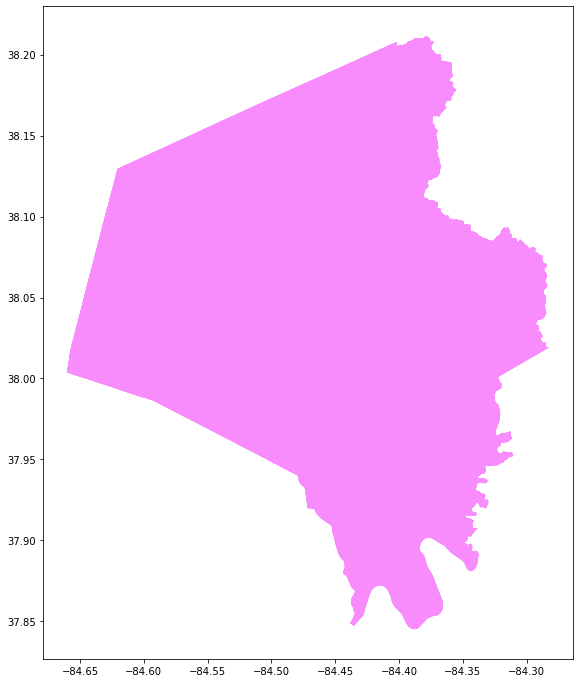

In [27]:
districtColor = '#F88CFC'

fig, ax = plt.subplots()

title = "Districts Merged 1972 - 2012"

district_merge3.plot(ax=ax, color=districtColor, linewidth=.1, zorder=0)

In [28]:
district3 = district_merge3[district_merge3['DISTRICT'] == 3]

In [29]:
district3.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.461074e+07,50792.825324,NaN,NaN,3,DICK DeCAMP,7.461073e+07,50792.824461,"POLYGON ((-84.51631 38.06095, -84.51621 38.060...",1982,7.0,6.0,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9.496719e+07,54684.493323,NaN,NaN,3,DICK DeCAMP,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050...",1992,NaN,NaN,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,9.554172e+07,60578.500564,NaN,NaN,3,DICK DeCAMP,9.554173e+07,60578.501888,"POLYGON ((-84.49785 38.05130, -84.49727 38.050...",2002,NaN,NaN,http://www.lfucg.com/Council/District03.asp,(859) 258-3200,dickd@lfucg.com,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN
2,474,NaN,NaN,NaN,NaN,3,HANNAH LEGRIS,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


<AxesSubplot:>

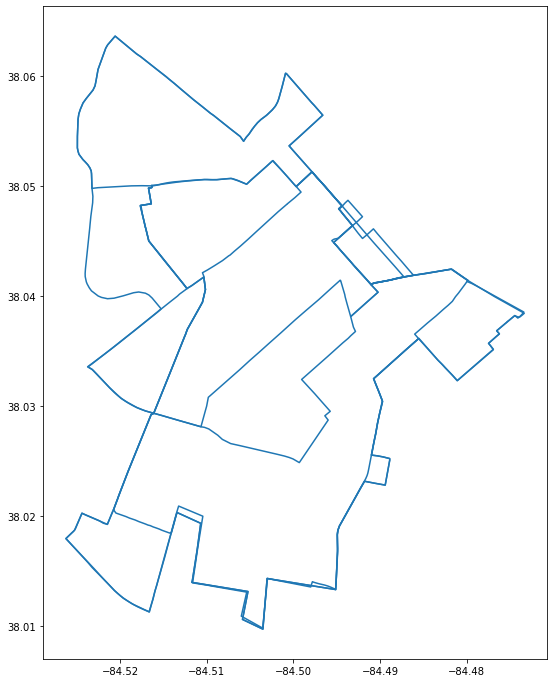

In [30]:
district3.boundary.plot()

<AxesSubplot:>

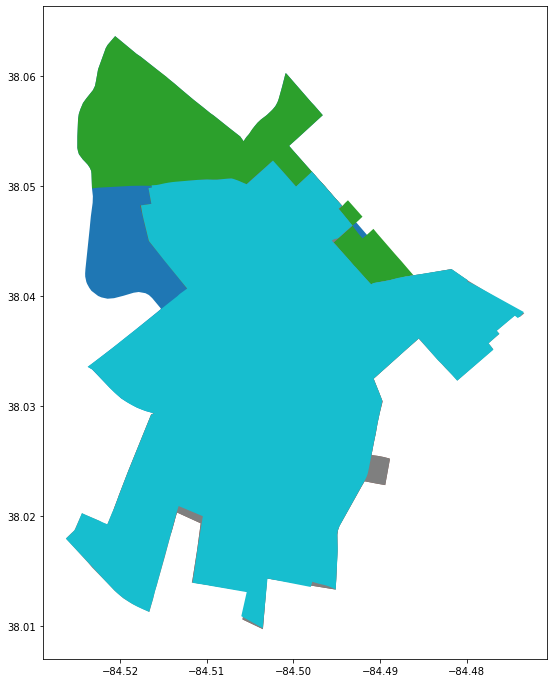

In [31]:
district3.plot(column='year')

In [32]:
district3.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.461074e+07,50792.825324,NaN,NaN,3,DICK DeCAMP,7.461073e+07,50792.824461,"POLYGON ((-84.51631 38.06095, -84.51621 38.060...",1982,7.0,6.0,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9.496719e+07,54684.493323,NaN,NaN,3,DICK DeCAMP,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050...",1992,NaN,NaN,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,9.554172e+07,60578.500564,NaN,NaN,3,DICK DeCAMP,9.554173e+07,60578.501888,"POLYGON ((-84.49785 38.05130, -84.49727 38.050...",2002,NaN,NaN,http://www.lfucg.com/Council/District03.asp,(859) 258-3200,dickd@lfucg.com,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN
2,474,NaN,NaN,NaN,NaN,3,HANNAH LEGRIS,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


In [35]:
district3_lines = district3

In [39]:
district3.to_file('data/clean_data', driver='ESRI Shapefile')